In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('data/data.xlsx')

In [3]:
df.head()

,Дата/время,"Мощность активная потребленная, кВт",Статус,Статус.1,Статус.2,Статус.3,Статус.4,Статус.5,Статус.6,"Мощность реактивная потреблённая, квар",...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Активная,Unnamed: 26,Реактивная,Unnamed: 28
0,2022-01-01 00:30:00.000,2.183023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.048994,...,NaN,NaN,0.1261,0.0991,NaN,Январь,4579.062700,264.5047,4362.671500,211.0015
1,2022-01-01 01:00:00.000,2.283432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.115157,...,NaN,NaN,0.1319,0.1023,NaN,NaN,17.311839,NaN,20.676021,NaN
2,2022-01-01 01:29:59.990,2.430582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.170982,...,NaN,NaN,0.1404,0.1050,NaN,Февраль,4446.753200,264.5729,4121.615000,210.9950
3,2022-01-01 01:59:59.985,2.331905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.108954,...,NaN,NaN,0.1347,0.1020,NaN,NaN,16.807289,NaN,19.534183,NaN
4,2022-01-01 02:29:59.980,2.640055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.357066,...,NaN,NaN,0.1525,0.1140,NaN,Март,4203.884300,264.6513,3986.646400,210.9834


In [4]:
df.drop(columns=df.columns[2:], inplace=True)

In [5]:
df.head()

,Дата/время,"Мощность активная потребленная, кВт"
0,2022-01-01 00:30:00.000,2.183023
1,2022-01-01 01:00:00.000,2.283432
2,2022-01-01 01:29:59.990,2.430582
3,2022-01-01 01:59:59.985,2.331905
4,2022-01-01 02:29:59.980,2.640055


In [6]:
def join_halfs_hour(df):
    new_df = []
    for row_1,row_2 in zip(df.iloc[::2].iterrows(), df.iloc[1::2].iterrows()):
        power = row_1[1][1] + row_2[1][1]
        date = row_2[1][0]
        new_df.append([date, power])

    return pd.DataFrame(columns=df.columns, data=new_df)

In [7]:
def split_date(df):
    for col, spliter in zip(['Год', 'Месяц',  'День', 'Час', 'Минута'], ['y', 'm', 'd', 'H', 'M']):
        df[col] = pd.to_datetime(df["Дата/время"]).dt.strftime(f"%{spliter}")
    

In [8]:
new_df = join_halfs_hour(df)

In [9]:
split_date(new_df)

In [10]:
new_df.drop(columns="Дата/время", inplace=True)

In [11]:
new_df.shape[0]/24/7

47.714285714285715

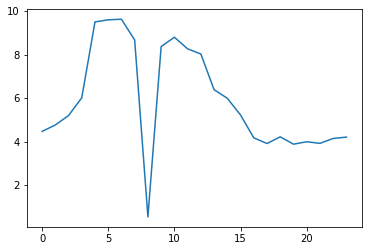

In [12]:
plt.plot(np.arange(24), new_df.iloc[:24, 0])

47


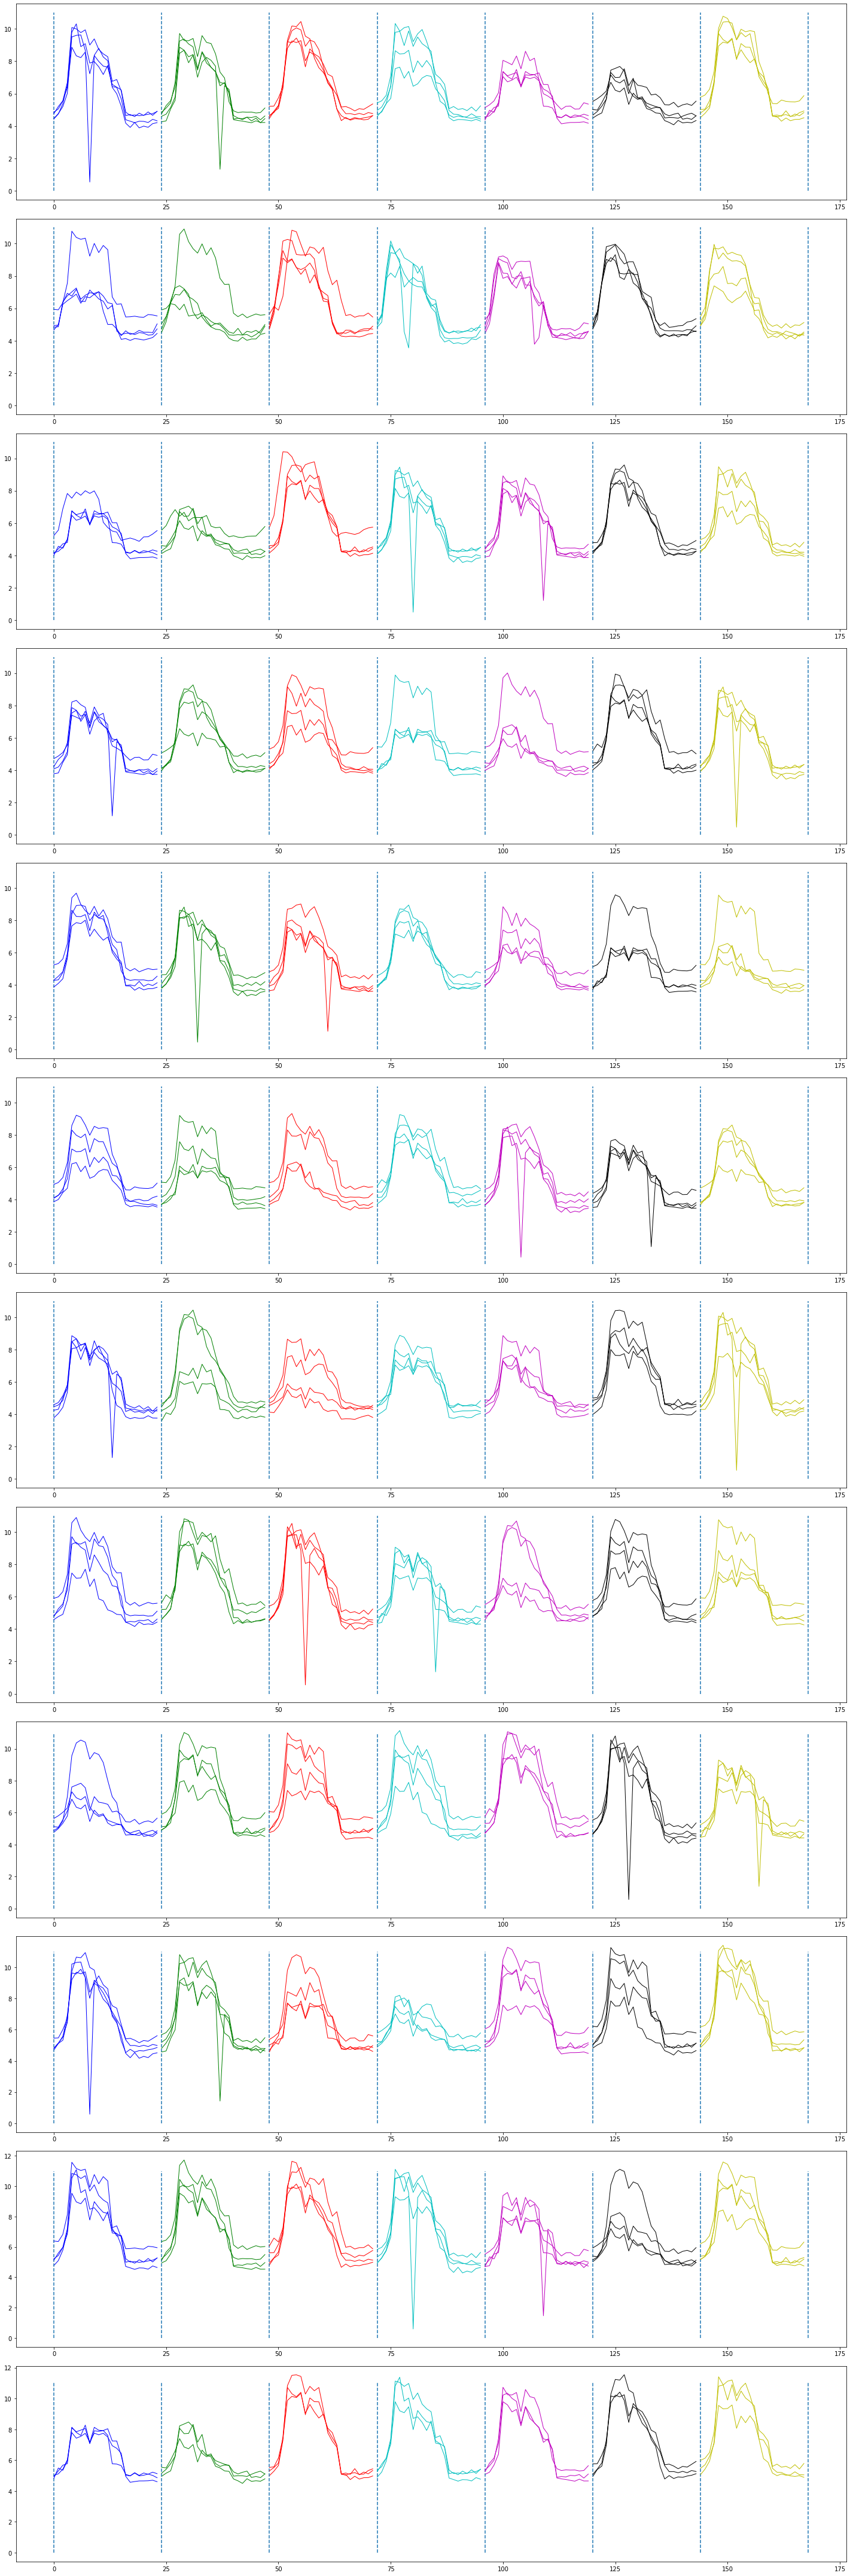

In [17]:
weaks_to_plot = int(np.floor(new_df.shape[0]/24/7))
print(weaks_to_plot)
fig, ax = plt.subplots(12, 1, figsize=(20, 60))
fig.tight_layout()
means = [0]*7
colors = 'bgrcmky'
for weak in range(weaks_to_plot):
    to_plot = ax[weak//4]
    for i in range(7):
        in_our = 24*(i) + weak*24*7
        out_hour = 24*(i+1) + weak*24*7
        a = new_df.iloc[in_our:out_hour, 0]
        weak_day = i
        means[weak_day] += a/4
        
        to_plot.plot(np.arange(24*i,24*(i+1)), a, c=colors[i%7], linewidth=1)
    

    if weak % 4 == 0:
        means = [0]*7
        to_plot.vlines([i*24 for i in range(0, 8)], [0], [11], linestyles='dashed')
        if weak != 0:
            pass



In [15]:
weaks_to_plot // 4

11

In [ ]:
threat = 1.6

In [ ]:
mean = new_df.iloc[:, 0].mean()

In [ ]:
new_df.iloc[:, 0].describe()

count    8016.000000
mean        6.202166
std         1.892198
min         0.439156
25%         4.686070
50%         5.684574
75%         7.536753
max        12.041551
Name: Мощность активная потребленная, кВт, dtype: float64

In [ ]:
blowouts = new_df[new_df.iloc[:, 0] < threat].index

In [ ]:
def clean_blowouts(df, indexes):
    for index in indexes:
        power = np.mean([df.iloc[index-1, 0], df.iloc[index + 1, 0]])
        df.iloc[index, 0] = power

In [ ]:
# clean_blowouts(new_df, blowouts)

In [19]:
new_df

,"Мощность активная потребленная, кВт",Год,Месяц,День,Час,Минута
0,4.466454,22,01,01,01,00
1,4.762487,22,01,01,01,59
2,5.195283,22,01,01,02,59
3,6.012402,22,01,01,03,59
4,9.504199,22,01,01,04,59
...,...,...,...,...,...,...
8011,5.984460,22,11,30,20,00
8012,6.120166,22,11,30,21,00
8013,6.238670,22,11,30,22,00
8014,6.152659,22,11,30,23,00
